## Training on Diabetes Dataset

In [2]:
'''
Assignment1 - Building a Good Training Set
Import the dataset - Diabetes.csv
Do the missing value treatment
Perform an exploratory data analysis with respect to the Outcome variable
Check for outliers with appropriate plots
Remove the outliers from the dataset
Perform feature scaling for the features
Find & List the most important 5 features to determine the Outcome variable
Check with heatmap or correlation matrix to confirm the 5 selected features
Perform PCA and generate two components for the 5 features selected
Split the data into train and test (75:25) keeping the target variable as Outcome
'''

'\nAssignment1 - Building a Good Training Set\nImport the dataset - Diabetes.csv\nDo the missing value treatment\nPerform an exploratory data analysis with respect to the Outcome variable\nCheck for outliers with appropriate plots\nRemove the outliers from the dataset\nPerform feature scaling for the features\nFind & List the most important 5 features to determine the Outcome variable\nCheck with heatmap or correlation matrix to confirm the 5 selected features\nPerform PCA and generate two components for the 5 features selected\nSplit the data into train and test (75:25) keeping the target variable as Outcome\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as scs

In [4]:
df = pd.read_csv("../ml_datasets/diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,NaN,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


### Treating raw data

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,799.000000,795.000000,764.000000,565.000000,799.000000,788.000000,799.000000,799.000000,799.000000
mean,3.838548,121.820126,72.451571,29.244248,80.638298,32.446193,0.470686,33.195244,0.350438
std,3.366162,30.482998,12.419133,10.478642,115.604570,6.885736,0.331856,11.686889,0.477406
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,22.000000,0.000000,27.500000,0.239500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,37.000000,32.300000,0.370000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,130.000000,36.625000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.count()

Pregnancies                 799
Glucose                     795
BloodPressure               764
SkinThickness               565
Insulin                     799
BMI                         788
DiabetesPedigreeFunction    799
Age                         799
Outcome                     799
dtype: int64

In [8]:
df.SkinThickness.mean()

29.244247787610618

### Treating NaN values

In [9]:
df.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
795,False,False,False,False,False,False,False,False,False
796,False,False,False,False,False,False,False,False,False
797,False,False,False,False,False,False,False,False,False
798,False,False,False,False,False,False,False,False,False


In [10]:
df.isna().sum()

Pregnancies                   1
Glucose                       5
BloodPressure                36
SkinThickness               235
Insulin                       1
BMI                          12
DiabetesPedigreeFunction      1
Age                           1
Outcome                       1
dtype: int64

In [11]:
df.SkinThickness.count()

565

In [12]:
df[df.isna().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8.0,183.0,64.0,NaN,0.0,23.3,0.672,32.0,1.0
5,5.0,116.0,74.0,NaN,0.0,25.6,0.201,30.0,0.0
7,10.0,115.0,NaN,NaN,0.0,35.3,0.134,29.0,0.0
9,8.0,125.0,96.0,NaN,0.0,NaN,0.232,54.0,1.0
10,4.0,110.0,92.0,NaN,0.0,37.6,0.191,30.0,0.0
...,...,...,...,...,...,...,...,...,...
776,4.0,90.0,NaN,NaN,0.0,28.0,0.610,31.0,0.0
786,2.0,120.0,54.0,NaN,0.0,26.8,0.455,27.0,0.0
791,11.0,127.0,106.0,NaN,0.0,39.0,0.190,51.0,0.0
793,10.0,162.0,84.0,NaN,0.0,27.7,0.182,54.0,0.0


In [13]:
df[df.isna().any(axis=1)].index

Index([  2,   5,   7,   9,  10,  11,  12,  15,  17,  21,
       ...
       766, 768, 769, 774, 775, 776, 786, 791, 793, 799],
      dtype='int64', length=245)

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
si = SimpleImputer(missing_values=np.nan, strategy="mean")

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,NaN,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


## Method 1 (Remove all NaN values)

In [17]:
df1 = df.copy(deep=True)

In [18]:
df1.dropna(inplace=True)

In [19]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
# scs.heatmap(data=df1.corr, annot=True)

In [21]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,3.493694,121.190991,71.529730,29.293694,115.888288,32.882162,0.502196,31.513514,0.336937
std,3.304282,31.021995,12.325918,10.521864,123.122558,6.858270,0.346004,10.644116,0.473090
min,0.000000,56.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,0.000000,27.850000,0.256000,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,92.000000,32.900000,0.415000,28.000000,0.000000
75%,5.000000,142.000000,80.000000,36.000000,165.000000,36.950000,0.659000,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


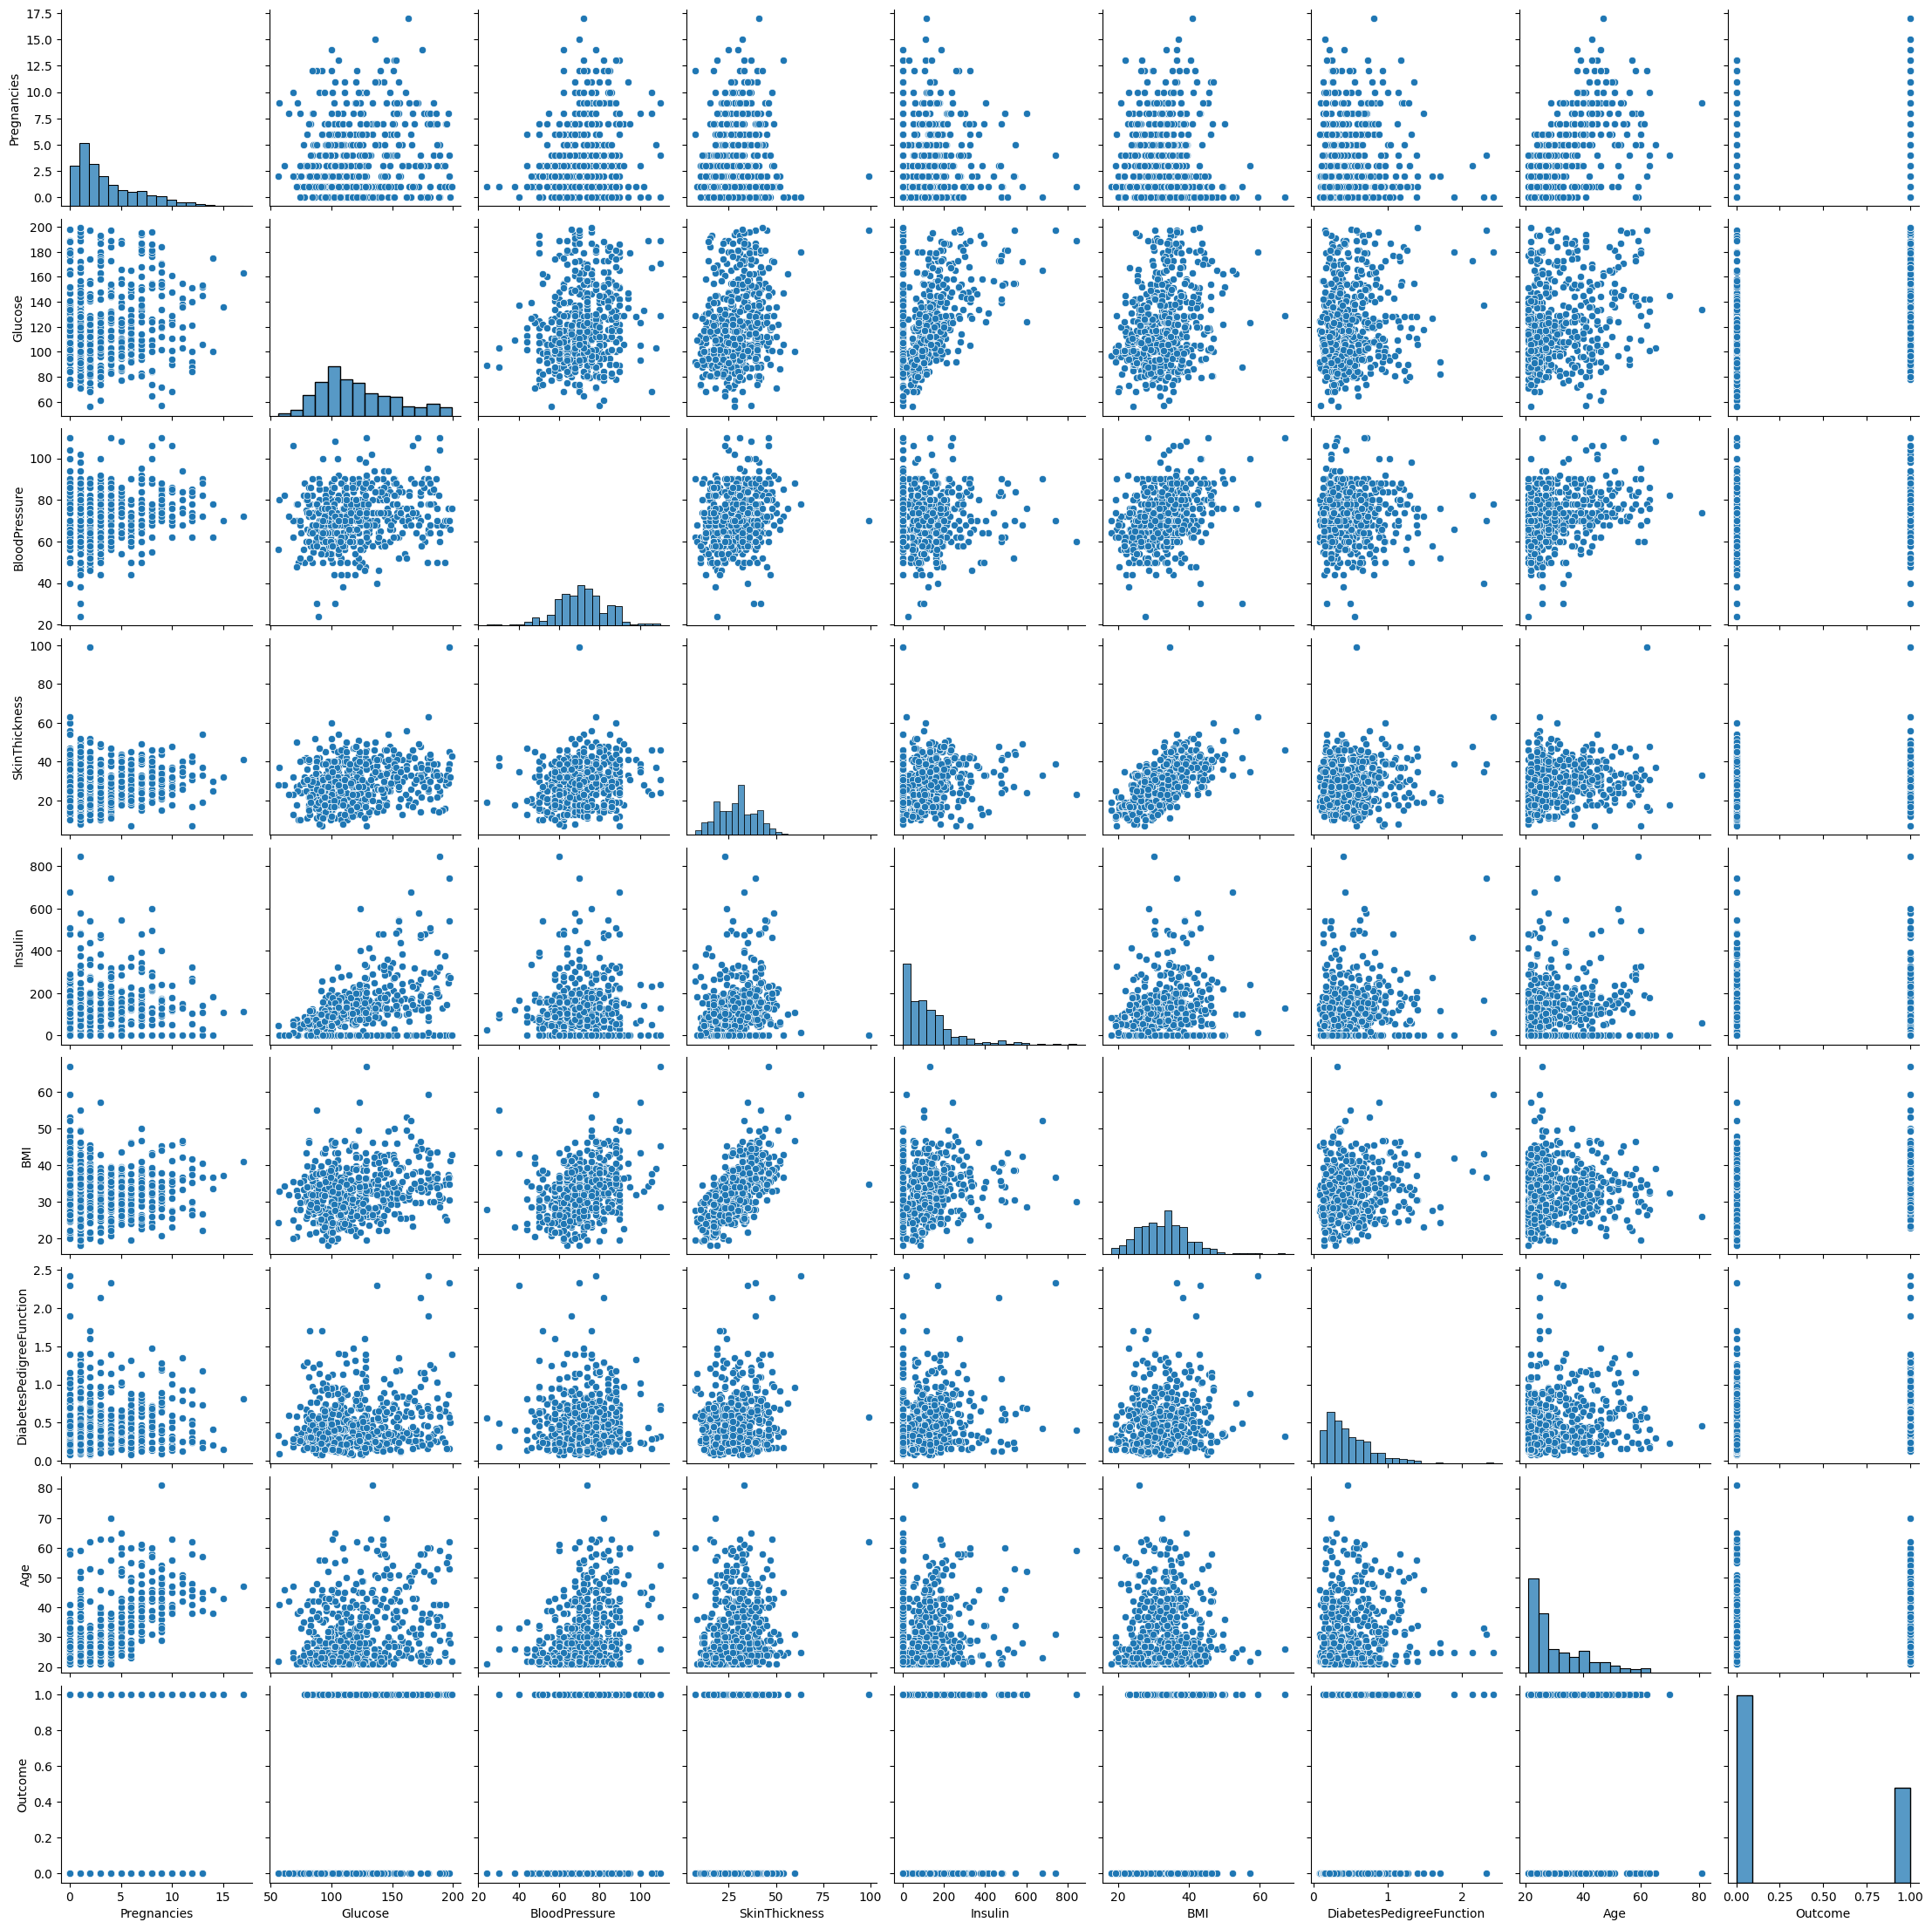

In [22]:
scs.pairplot(data=df1)
plt.show()

### Scaling down values by MinMaxScaler

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Binarizer
mmscaler = MinMaxScaler(feature_range=(0,1))
scaled = mmscaler.fit_transform(df1)

In [24]:
new_df = pd.DataFrame(scaled, columns=['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age', 'Outcome'])

In [25]:
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.643357,0.558140,0.304348,0.000000,0.314928,0.232120,0.483333,1.0
1,0.058824,0.202797,0.488372,0.239130,0.000000,0.171779,0.113919,0.166667,0.0
2,0.058824,0.230769,0.488372,0.173913,0.111111,0.202454,0.035118,0.000000,0.0
3,0.000000,0.566434,0.186047,0.304348,0.198582,0.509202,0.943469,0.200000,1.0
4,0.176471,0.153846,0.302326,0.271739,0.104019,0.261759,0.069807,0.083333,1.0


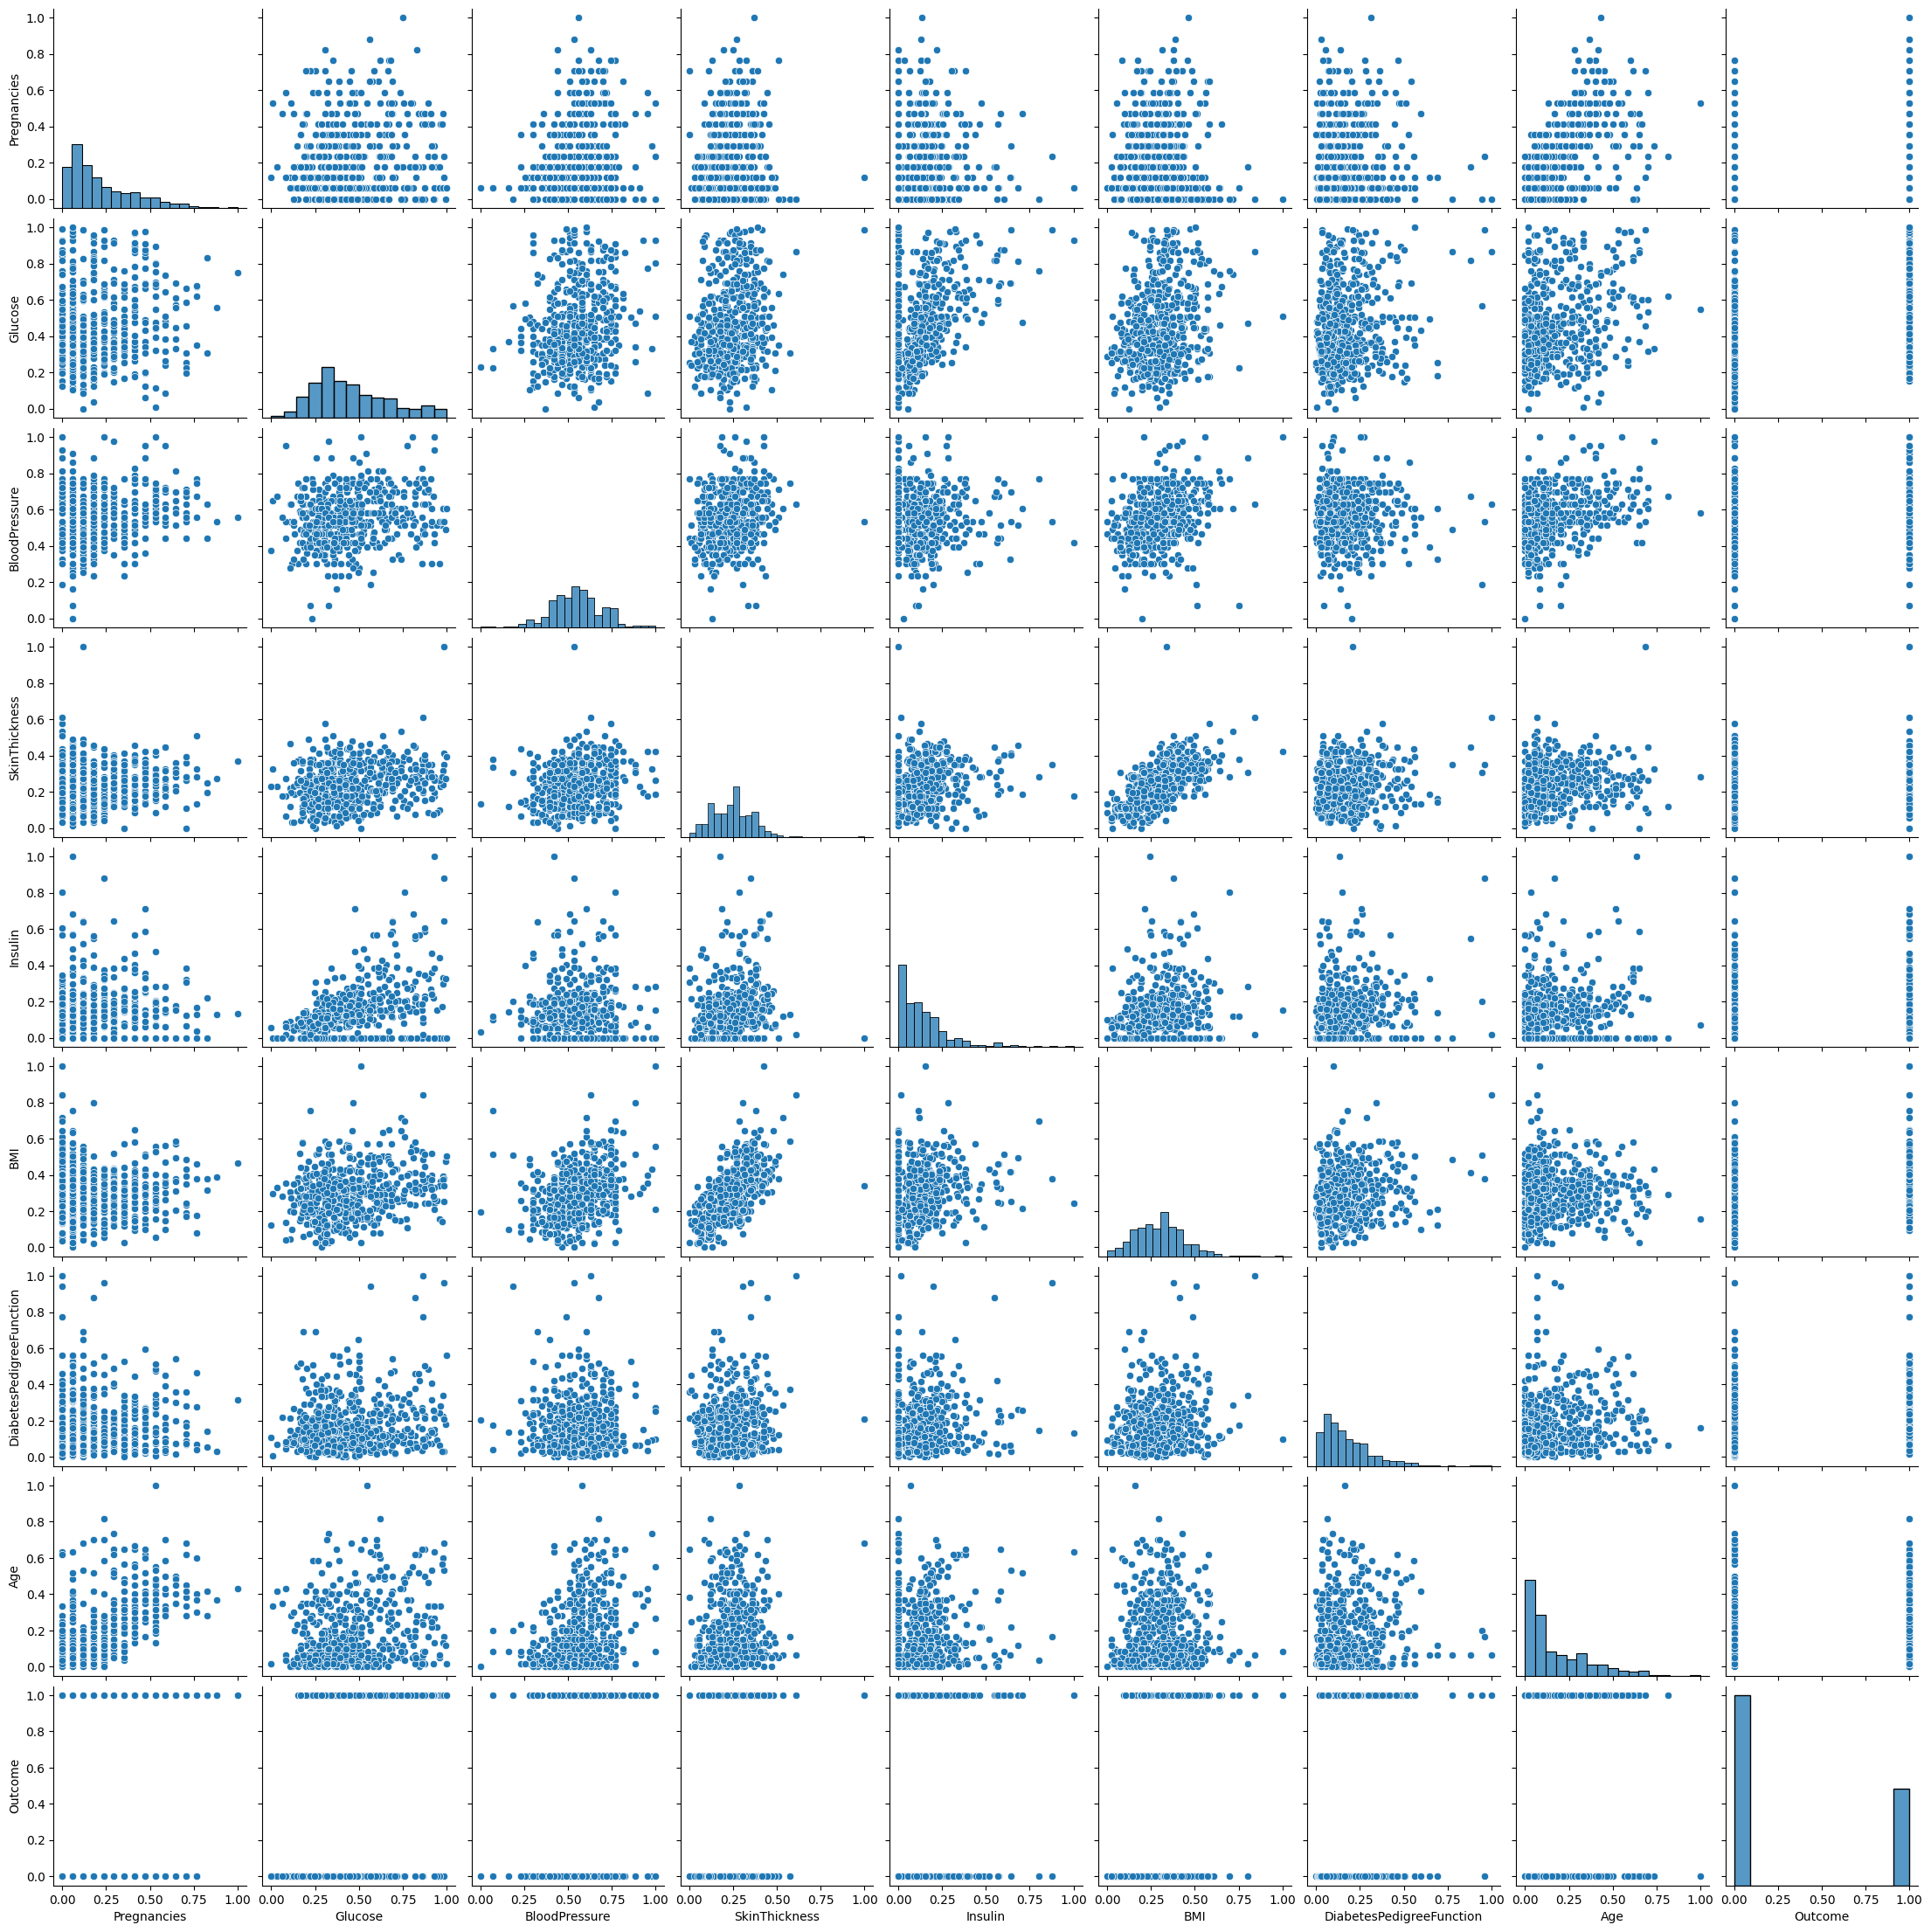

In [26]:
scs.pairplot(data=new_df)
plt.show()

In [27]:
new_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,0.205511,0.455881,0.552671,0.242323,0.136984,0.300249,0.178671,0.175225,0.336937
std,0.194370,0.216937,0.143325,0.114368,0.145535,0.140251,0.148181,0.177402,0.473090
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.300699,0.465116,0.163043,0.000000,0.197342,0.073233,0.033333,0.000000
50%,0.117647,0.412587,0.558140,0.239130,0.108747,0.300613,0.141328,0.116667,0.000000
75%,0.294118,0.601399,0.651163,0.315217,0.195035,0.383436,0.245824,0.283333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
new_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.643357,0.558140,0.304348,0.000000,0.314928,0.232120,0.483333,1.0
1,0.058824,0.202797,0.488372,0.239130,0.000000,0.171779,0.113919,0.166667,0.0
2,0.058824,0.230769,0.488372,0.173913,0.111111,0.202454,0.035118,0.000000,0.0
3,0.000000,0.566434,0.186047,0.304348,0.198582,0.509202,0.943469,0.200000,1.0
4,0.176471,0.153846,0.302326,0.271739,0.104019,0.261759,0.069807,0.083333,1.0


### Find & List the most important 5 features to determine the Outcome variable

In [30]:
from sklearn.feature_selection import SelectKBest, f_regression
x = new_df.iloc[:,:9]
y = new_df.Outcome
sk = SelectKBest(f_regression,k=5)
sk.fit_transform(x,y)

array([[0.35294118, 0.64335664, 0.30434783, 0.31492843, 0.48333333],
       [0.05882353, 0.2027972 , 0.23913043, 0.17177914, 0.16666667],
       [0.05882353, 0.23076923, 0.17391304, 0.20245399, 0.        ],
       ...,
       [0.52941176, 0.62237762, 0.42391304, 0.40286299, 0.31666667],
       [0.35294118, 0.41258741, 0.34782609, 0.31697342, 0.31666667],
       [0.05882353, 0.39160839, 0.41304348, 0.3394683 , 0.05      ]])

##### Five imp features are: Pregnancies, Glucose, SkinThickness, BMI, Age

### Check with heatmap or correlation matrix to confirm the 5 selected features

<Axes: >

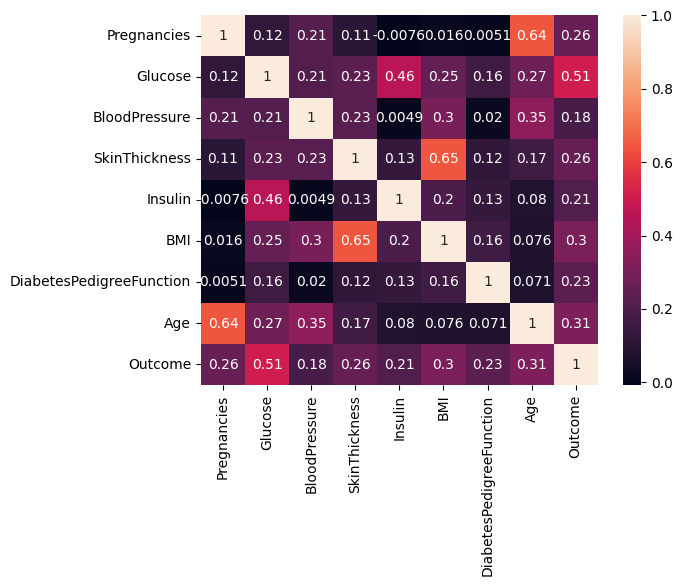

In [31]:
corr_matrix = new_df.corr()
scs.heatmap(data=corr_matrix, annot=True)

## Goal : Predict Diabetes of a patient by 

In [32]:
new_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [33]:
from sklearn.decomposition import PCA

top_five = new_df.copy(deep=True)
top_five.drop(['BloodPressure', 'Insulin','DiabetesPedigreeFunction'], axis=1, inplace=True)

pca = PCA(n_components=2)
x = top_five.iloc[:,:6]
principalComponents = pca.fit_transform(x)
top_five

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.352941,0.643357,0.304348,0.314928,0.483333,1.0
1,0.058824,0.202797,0.239130,0.171779,0.166667,0.0
2,0.058824,0.230769,0.173913,0.202454,0.000000,0.0
3,0.000000,0.566434,0.304348,0.509202,0.200000,1.0
4,0.176471,0.153846,0.271739,0.261759,0.083333,1.0
...,...,...,...,...,...,...
550,0.058824,1.000000,0.391304,0.505112,0.016667,1.0
551,0.470588,0.776224,0.423913,0.396728,0.366667,1.0
552,0.529412,0.622378,0.423913,0.402863,0.316667,1.0
553,0.352941,0.412587,0.347826,0.316973,0.316667,1.0


In [34]:
df2 = pd.DataFrame(principalComponents)
df2.head()

,0,1
0,0.739812,0.175938
1,-0.414649,-0.042390
2,-0.432682,-0.149309
3,0.652648,-0.281399
4,0.526294,-0.204539


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Outcome'] = le.fit_transform(new_df[['Outcome']])

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
df2.count()

0          555
1          555
Outcome    555
dtype: int64

## Splitting of Data into Train and Test

In [37]:
x = df2.iloc[:, :2]
y = df2['Outcome']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size=0.75, shuffle=True, random_state=2)

In [38]:
xtrain.shape, xtest.shape

((416, 2), (139, 2))

## Simple Linear Regression Model

In [39]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain, ytrain)
reg.coef_, reg.intercept_

(array([ 0.93823654, -0.18732364]), 0.3357233751868338)

In [40]:
y_pred = reg.predict(xtest)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(ytest, y_pred), mean_squared_error(ytest, y_pred)

(0.03979627648885512, 0.0025061123625877853)

## Prediction Accuracy

In [43]:
from sklearn.metrics import r2_score
rscore = r2_score(ytest, y_pred)
print("Accuracy: ", rscore*100, "%")

Accuracy:  98.90202727987395 %


In [45]:
rscore = r2_score(ytrain, reg.predict(xtrain))
print("Accuracy: ", rscore*100, "%")

Accuracy:  98.73168094511934 %
